# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


In [11]:

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
from requests import request


url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}" 
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 

        #Make an API request to the endpoint URL for the city
        response = request.get(city_url)

        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | annonay
City not found. Skipping...
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | dicabisagan
City not found. Skipping...
Processing Record 4 of Set 1 | bluff
City not found. Skipping...
Processing Record 5 of Set 1 | ukiah
City not found. Skipping...
Processing Record 6 of Set 1 | kodiak
City not found. Skipping...
Processing Record 7 of Set 1 | khorixas
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
City not found. Skipping...
Processing Record 9 of Set 1 | havelock
City not found. Skipping...
Processing Record 10 of Set 1 | calama
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 12 of Set 1 | nkhata bay
City not found. Skipping...
Processing Record 13 of Set 1 | tiksi
City not found. Skipping...
Processing Record 14 of Set 1 | new norfolk
City not found. Ski

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [25]:
# Display sample data
city_data_df.head()

""


In [26]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

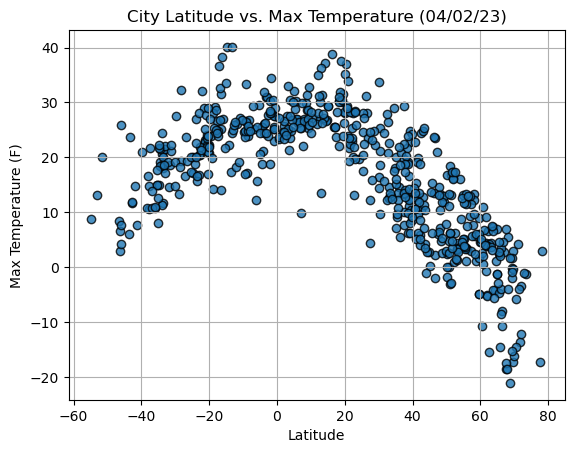

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

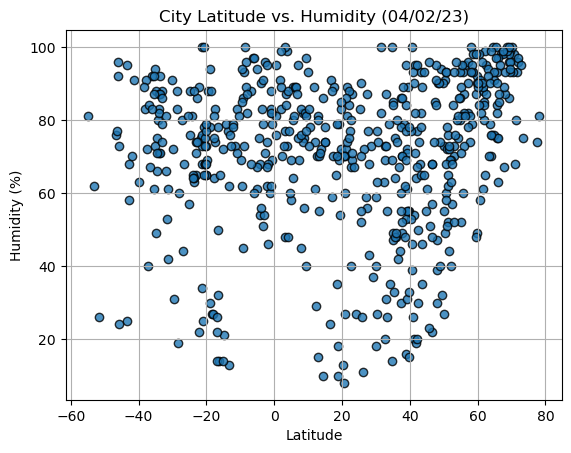

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

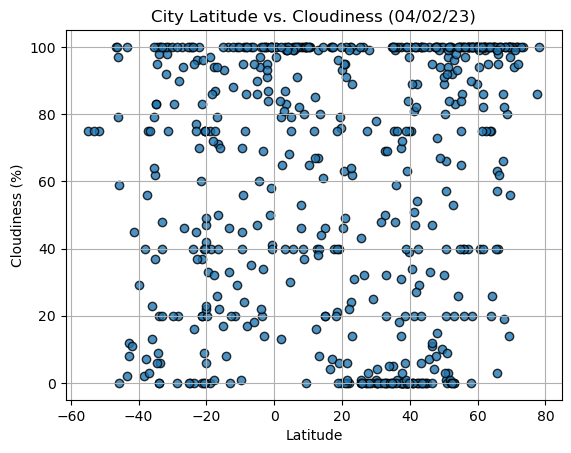

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy_Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

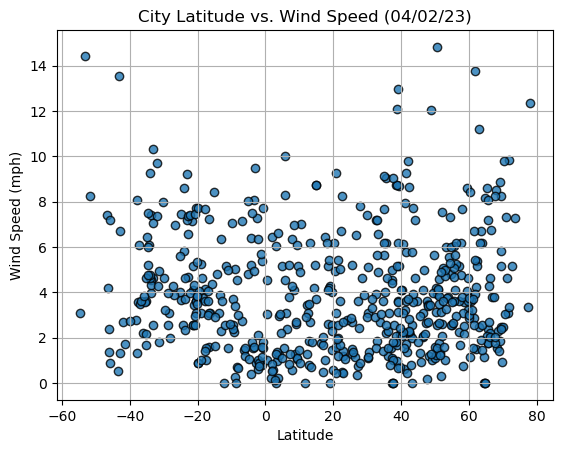

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WeatherPy_Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
        # Run regression on hemisphere weather data
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
        # Calculate the regression line "y values" from the slope and intercept
        regress_values = x_values * slope + intercept
    
        # Get the equation of the line
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
        # Create a scatter plot and plot the regression line
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        
        # Annotate the text for the line equation
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.title(title)
        plt.show()

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

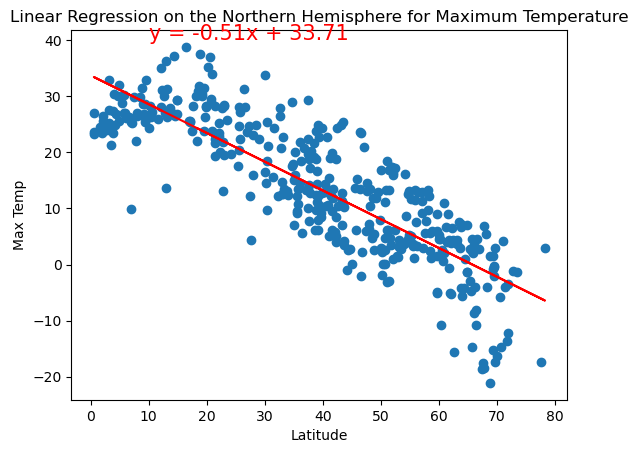

In [48]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

# show the plot
plt.show()


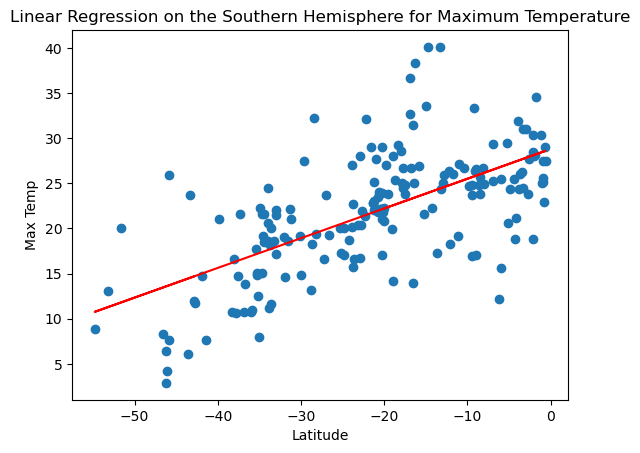

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

# format the plot
plt.show()


**Discussion about the linear relationship:** You can see from both graphs and plots that Max tempature changes drastically as the latitude line degree gets closer to the poles. The norhtern plot shows the max tempature getting colder as we get closer to the pole and warmer as we are closer to the equater. The southern hemphisphere is the same concept. As we get close to the the equater the tempature is the hottest and when we move towards the south pole the tempature gets cooler. 

### Humidity vs. Latitude Linear Regression Plot

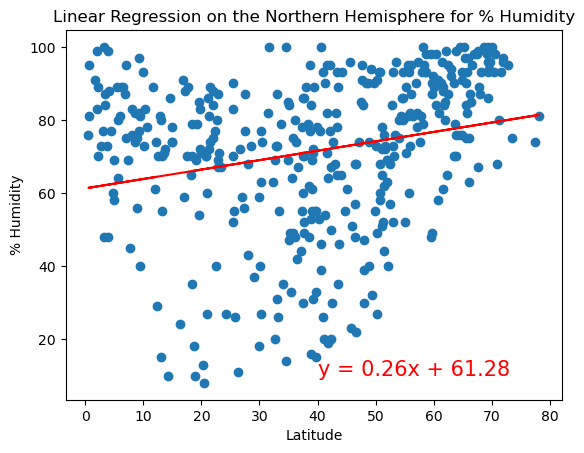

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

# show the plot
plt.show()

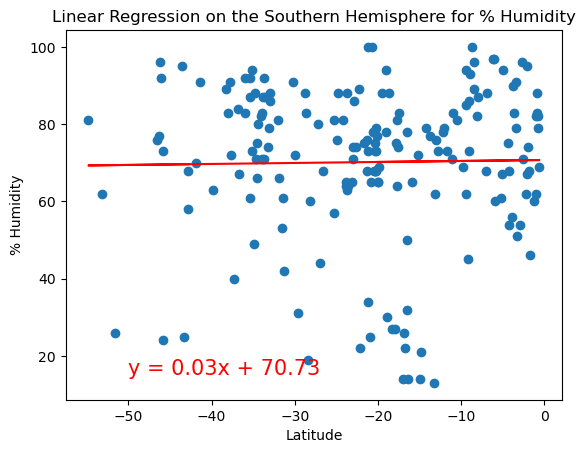

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

# show the plot
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere it seems that humidity will move in the upwards direction as we move towards the pole. The south hemisphere seems to be a constant dose of humidity between the pole and the equaiter line. 

### Cloudiness vs. Latitude Linear Regression Plot

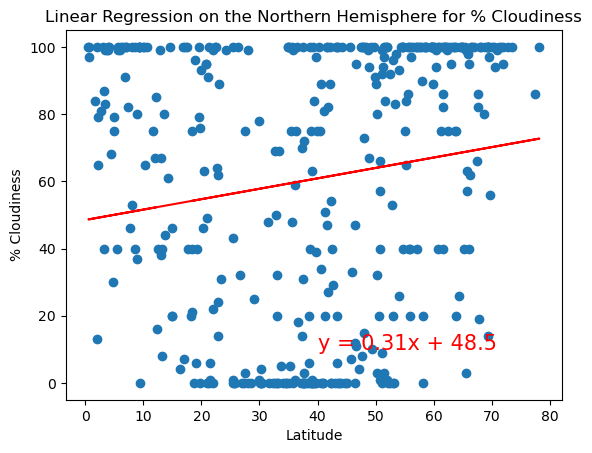

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

# show the plot
plt.show()

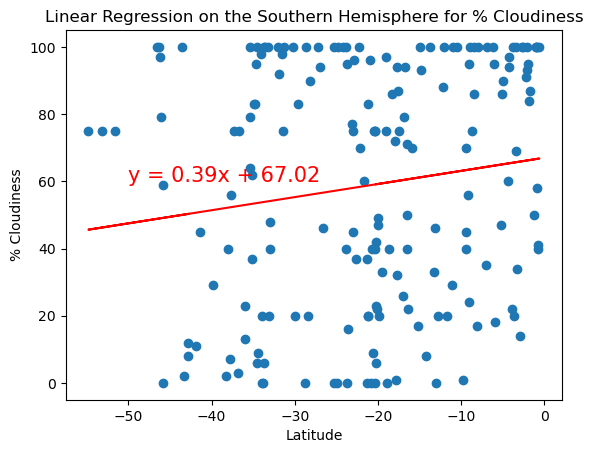

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

# show the plot
plt.show()

**Discussion about the linear relationship:** The two plots show a tend of more clouds towards the equaiter for both hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

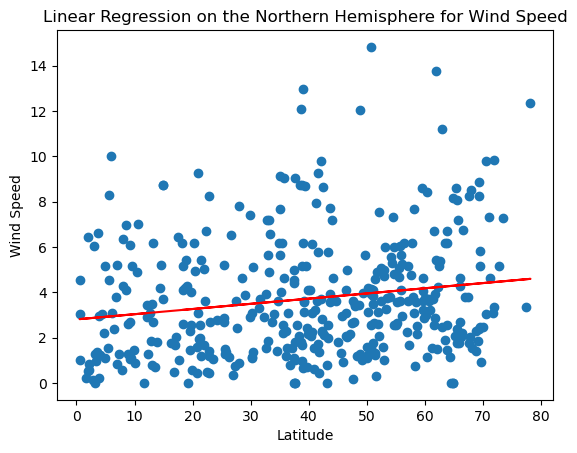

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

# show the plot
plt.show()

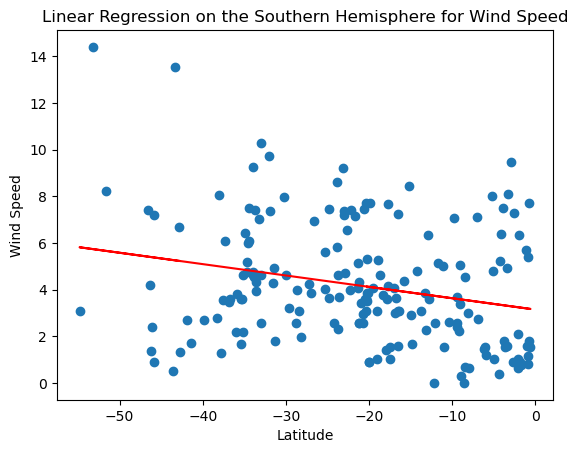

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

# show the plot
plt.show()

**Discussion about the linear relationship:** Seems that wind speed also follows the cloud concept as there tends to be more towards the equaiter then the poles. 